# Line Graphs and Histograms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Create our dataset

### Generate a sequence of dates for one month
We'll use the Pandas date_range method to do this.

In [2]:
dates = pd.date_range(start='2024-10-01', end='2024-10-31')

Let's have a look and see what dates were generated.

In [3]:
dates

DatetimeIndex(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
               '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12',
               '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20',
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-26', '2024-10-27', '2024-10-28',
               '2024-10-29', '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', freq='D')

### Create a dictionary to define plausible ranges for each day of the week
We can adjust these ranges to reflect how busy you expect each day to be (or we could collect real sales data of course).

In [4]:
day_of_week_sales_range = {
    'Monday':    (80,  100),
    'Tuesday':   (90,  110),
    'Wednesday': (85,  105),
    'Thursday':  (90,  120),
    'Friday':    (100, 140),
    'Saturday':  (130, 200),  # Typically a busier day
    'Sunday':    (110, 160)   # Can also be relatively busy
}

### Generate random integer sales for each date, based on the day of the week

We're using numpy to generate random integers for the number of sales. We first set the seed to an initial value. This ensures that we get the same randomly generated integers every time.

There's nothing special about the number 42, any seed value would do. 42 is often used because it's a reference to the Hitchhiker's Guide to the Galaxy and programmers like that sort of thing. 

In [5]:
np.random.seed(42)

Next, generate the number of sales for each date.

See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for more information on strftime and why '%A' was used.

In [6]:
coffees_sold = []

for date in dates:
    # Get the name of the day (e.g., "Monday", "Tuesday", etc.)
    day_name = date.strftime('%A')

    # Retrieve the min/max sales range from our dictionary
    min_val, max_val = day_of_week_sales_range[day_name]

    # Generate a random number of coffees sold within that range
    coffees_sold.append(np.random.randint(min_val, max_val + 1))

### Create a Pandas DataFrame from the generated data

In [7]:
data = {
    'Date': dates,
    'Coffees_Sold': coffees_sold
}
df = pd.DataFrame(data)

Finally, our synthetic dataset is ready for visualisation.

## Plot a line graph of daily coffee sales over the month

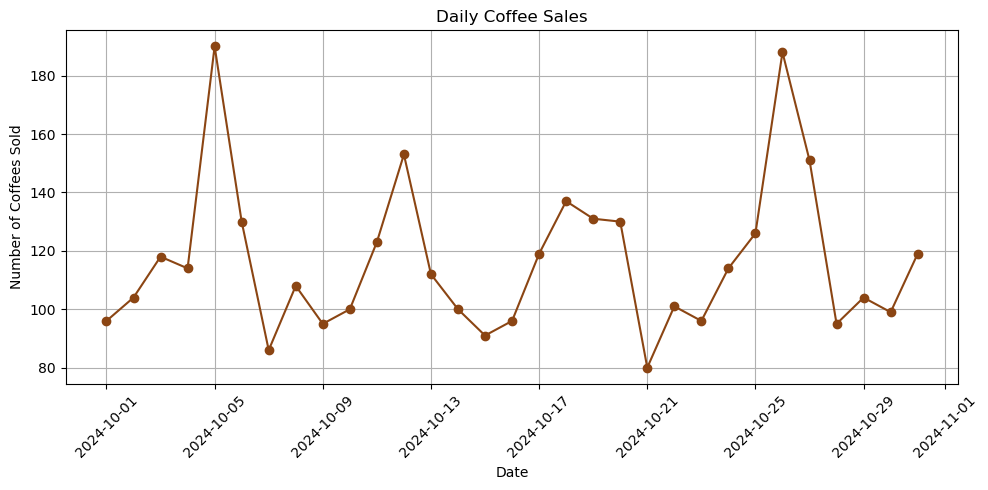

In [8]:
plt.figure(figsize=(10, 5))

plt.plot(df['Date'],
         df['Coffees_Sold'],
         marker='o',
         linestyle='-',
         color='#8B4513')

plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Number of Coffees Sold')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.grid(True)

plt.tight_layout()

plt.show()

## Plot a histogram of daily coffee sales over the month

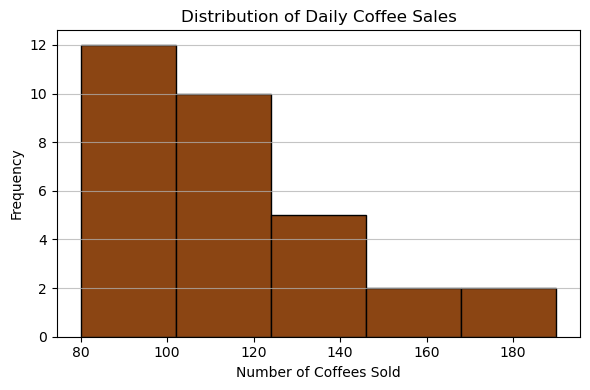

In [9]:
plt.figure(figsize=(6, 4))

plt.hist(df['Coffees_Sold'],
         bins=5,
         color='#8B4513',
         edgecolor='black')

plt.title('Distribution of Daily Coffee Sales')
plt.xlabel('Number of Coffees Sold')
plt.ylabel('Frequency')

# What would happen if used plt.grid(True) rather than this line?
plt.grid(axis='y', alpha=0.75)
#plt.grid(True)

plt.tight_layout()

plt.show()

What happens when we vary the number of bins?

## Plotting more than one series on the same graph
Next we'll generate some sythetic pastry sales data and then plot it alongside the coffee sales data.

In [10]:
# Define ranges for pastries sold based on the day of the week
pastry_sales_range = {
    'Monday':    (30,  50),
    'Tuesday':   (35,  55),
    'Wednesday': (40,  60),
    'Thursday':  (45,  70),
    'Friday':    (50,  90),
    'Saturday':  (70, 120),
    'Sunday':    (60, 100)
}

# We'll use the same approach as before to generate random sales data
pastries_sold = []

for date in dates:
    # Determine the weekday name (e.g., 'Monday', 'Tuesday', ...)
    day_name = date.strftime('%A')

    # Generate pastry sales within the specified range
    min_p, max_p = pastry_sales_range[day_name]
    pastries_sold.append(np.random.randint(min_p, max_p + 1))

# Add the pastries sold data to our DataFrame
df['Pastries_Sold'] = pastries_sold

### Plot both numeric sequences (Coffees and Pastries) on the same line graph

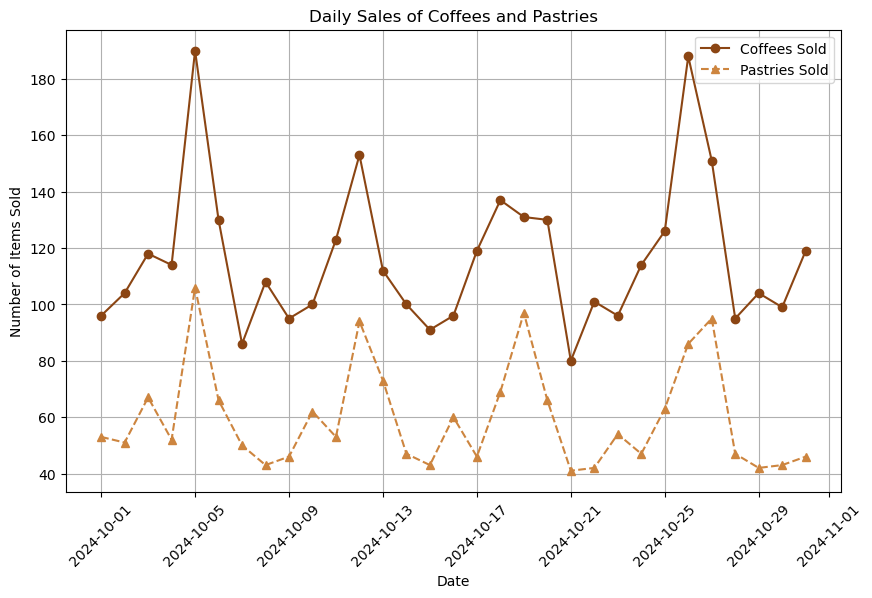

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(df['Date'],
         df['Coffees_Sold'],
         marker='o',
         linestyle='-',
         color='#8B4513',
         label='Coffees Sold')

plt.plot(df['Date'],
         df['Pastries_Sold'],
         marker='^',
         linestyle='--',
         color='#CD853F',
# When might setting an alpha be useful?
#         alpha=0.7,
         label='Pastries Sold')

plt.title('Daily Sales of Coffees and Pastries')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)

# Display legend to differentiate between the two plots
plt.legend()

#plt.tight_layout()
plt.show()

# Challenge
1. Save the DataFrame (df) to a csv file.
2. Open the CSV file (e.g. in Excel or a text editor) and change some of the sales amounts. If you use Excel, remember to save it as a csv file again (it is actually possible to read an Excel file into a Pandas DataFrame, but this is optional and you would need to investigate how to do it).
3. Load the modified data into a Pandas DataFrame and use Matplotlib to create the line graph and histogram.

In [12]:
# Hint: Use the `to_csv` method of the DataFrame to save it to a CSV file.
# What happens if you don't include the `index=False` argument?
df.to_csv('coffee_shop_sales.csv', index=False)